<a href="https://colab.research.google.com/github/SPK-1729/Magnus-Carlsen-Performance-Analysis-from-2001-to-2022-/blob/master/Magnus_Game_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Magnus Carlsen Performance Analysis(2001-2022)**
---





#Importing Modules

In [ ]:
# Importing necessary modules for visualizing the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Loading our data into Pandas DataFrames ds1 and ds2
ds1 = pd.read_csv(r"/Carlsen_game_info(version  2).csv")
ds2 = pd.read_csv(r"/Carlsen_moves_termination_type.csv")



 # Overview of 2 datasets ds1 and ds2

In [ ]:
# Function to get an overview of a dataset
def dataset_overview(df, name):
    print(f"Overview of {name}:\n")
    print("Shape:", df.shape)
    print("\nInfo:")
    print(df.info())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nLast 5 Rows:")
    print(df.tail())
    print("\nColumn Names:")
    print(df.columns)

# Getting an overview of ds1 and ds2
dataset_overview(ds1, 'Dataset 1')
dataset_overview(ds2, 'Dataset 2')

Overview of Dataset 1:

Shape: (4313, 24)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                4313 non-null   object 
 1   game_order             4313 non-null   int64  
 2   event                  4313 non-null   object 
 3   site                   4313 non-null   object 
 4   Year                   4313 non-null   int64  
 5   round                  4313 non-null   object 
 6   white                  4313 non-null   object 
 7   black                  4313 non-null   object 
 8   result                 4313 non-null   object 
 9   white_elo              4292 non-null   float64
 10  white_rating_diff      4258 non-null   float64
 11  black_elo              4279 non-null   float64
 12  black_rating_diff      4258 non-null   float64
 13  winner                 4313 non-null   object 
 14  winner_

From above overview we can conclude that these datasets provide comprehensive information about chess games, including player details, game outcomes, move sequences, and board state information, suitable for various analyses and modeling tasks in chess analytics and furhter we can EDA using these columns to get a better idea about Magnus Carlsen game style.

# 1) Barplot for win, loss, and draw rates over time (by year)



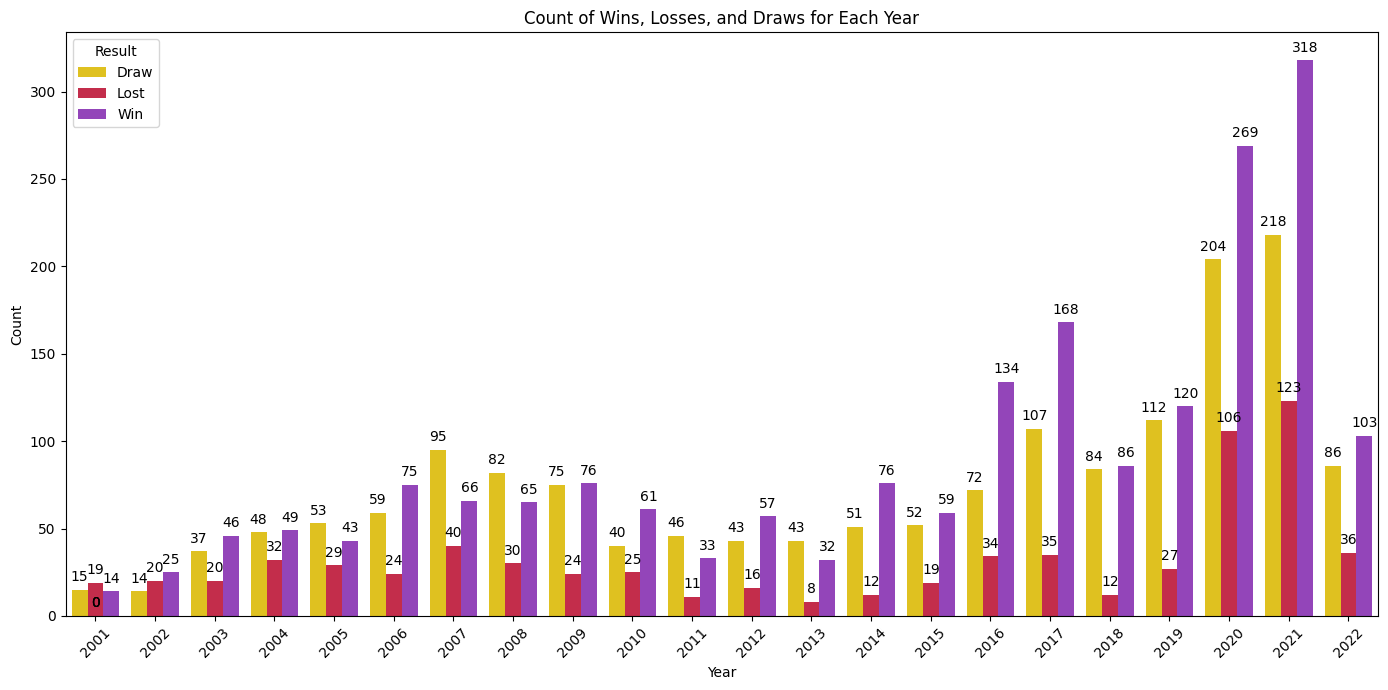

In [ ]:
# Step 1: Aggregation of data by year and result
ax2=result_counts1 = ds1.groupby(['Year', 'Carlsen,Magnus Result']).size().reset_index(name='Count')
# Step 2: Creating a bar plot
plt.figure(figsize=(14, 7))
ax=sns.barplot(x='Year', y='Count', hue='Carlsen,Magnus Result', data=result_counts1, palette=['#FFD700','#DC143C','#9932CC'])
# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.title('Count of Wins, Losses, and Draws for Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Result')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



---


From the bar chart we can conclude that, Magnus's total games (wins, losses, and draws) have increased over the years. In 2021, he achieved his highest number of wins compared to 2020, and his lowest was 14 wins in 2001. This trend suggests Magnus is steadily improving his performance year by year. Keep up the great work, Magnus!

---



 # 2) Pie chart for result(%) analysis



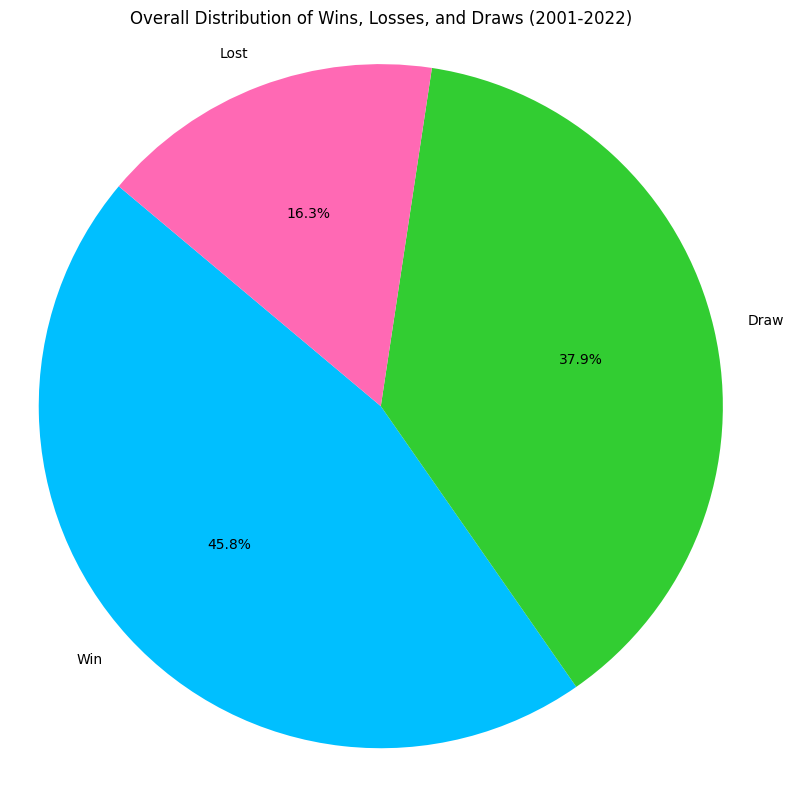

In [ ]:
# Step 1: Calculation of total counts for the pie chart
total_counts = ds1['Carlsen,Magnus Result'].value_counts()
# Step 2: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140, colors=['#00BFFF' ,'#32CD32','#FF69B4' ])
plt.title('Overall Distribution of Wins, Losses, and Draws (2001-2022)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()



---


From the pie chart we can conculde that wins take the largest slice of the pie chart, at 45.8%, showing a strong winning streak. Draws follow closely behind at 37.9%, indicating many games end without a clear winner. Losses make up the smallest slice at 16.3%, suggesting they're less frequent. Overall, the chart paints a picture of success, with more wins than losses and a fair share of draws.

---



# 3) Overall result from 2001-2022

Total Counts:
Carlsen,Magnus Result
Win     1975
Draw    1636
Lost     702
Name: count, dtype: int64


<ipython-input-25-0b69d70de20c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(x=total_counts.index, y=total_counts.values, palette=['#4169E1', '#39FF14', '#FF1493' ])


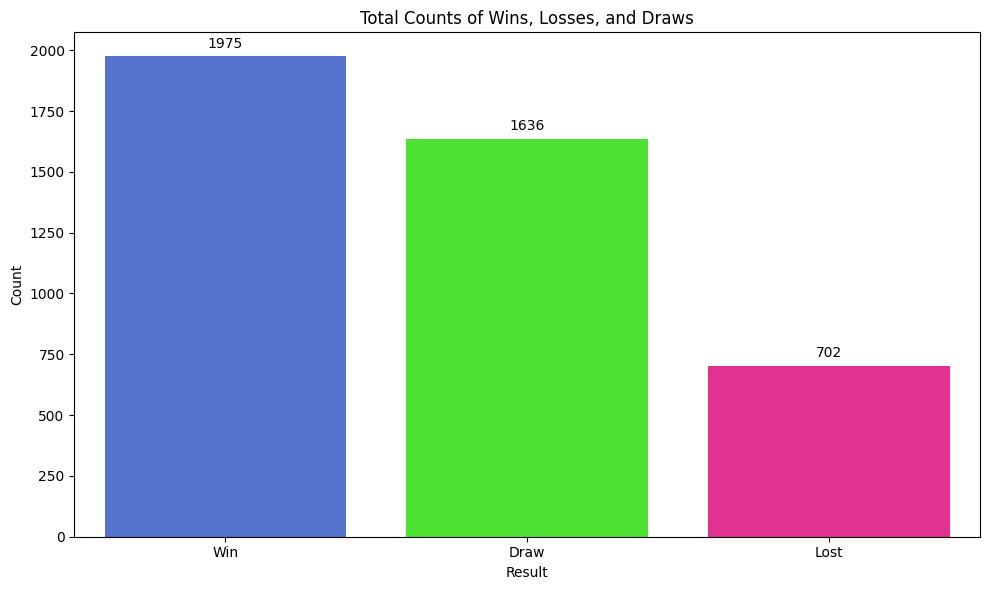

In [ ]:
# Step 1: Calculate total counts for each result
total_counts = ds1['Carlsen,Magnus Result'].value_counts()
# Printing the total counts
print("Total Counts:")
print(total_counts)
# Step 2: Create a bar plot
plt.figure(figsize=(10, 6))
ax1=sns.barplot(x=total_counts.index, y=total_counts.values, palette=['#4169E1', '#39FF14', '#FF1493' ])
# Adding data labels to each bar
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                 textcoords = 'offset points')
plt.title('Total Counts of Wins, Losses, and Draws')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

---
The bar graph titled "Count of Wins, Losses, and Draws for Each Year" indicates that more games were played each year over the period from 2001 to 2022. Wins consistently outnumber losses and draws, suggesting a positive trend in performance.

---



# 4) Line chart of Carlsen Performance according to  his White ELO and Black ELO



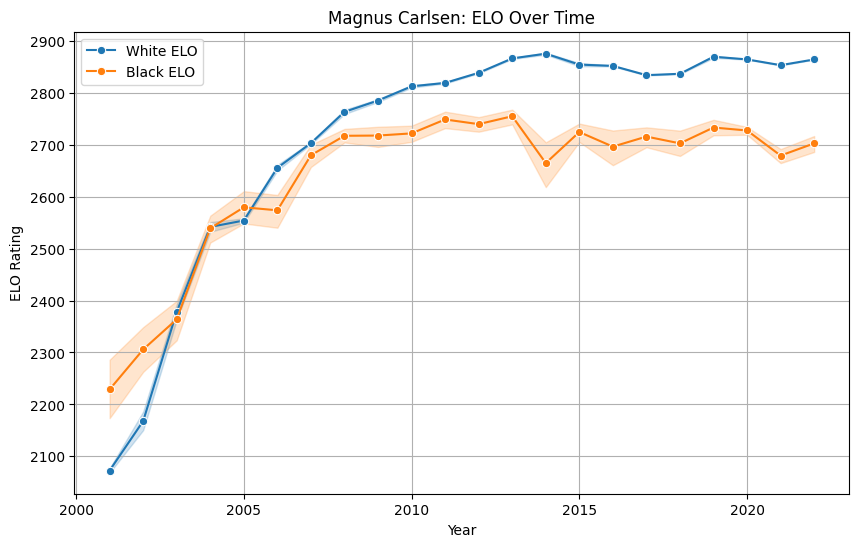

In [ ]:
# Filter data for Carlsen, Magnus in the white column
carlsen_data = ds1[ds1['white'] == 'Carlsen,Magnus']
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=carlsen_data, x='Year', y='white_elo', marker='o', label='White ELO')
sns.lineplot(data=carlsen_data, x='Year', y='black_elo', marker='o', label='Black ELO')
plt.title('Magnus Carlsen: ELO Over Time')
plt.xlabel('Year')
plt.ylabel('ELO Rating')
plt.legend()
plt.grid(True)
plt.show()

---

The line graph of Magnus Carlsen's ELO rating over time shows a clear and steady increase, indicating ongoing improvement in his chess skills. While there are some fluctuations, the overall trend is upward, highlighting his consistent growth as a player.And I prefer white when I got a chance to play with him.

---



# 5) Carlsen Performance according to win,lost,draw in different sites



                Place  Won  Lost  Draw  Average_Winner_Elo  Average_Loser_Elo
108   chess24.com int  358   132     0         2827.240816        2748.881633
92      chess.com int  221    52     0         2823.373626        2672.141791
111   lichess.org int  179    78     0         2786.299611        2698.147860
20         moscow rus  123    52     0         2776.005714        2725.062857
19   wijk aan zee ned   83    18     0         2757.891089        2680.871287
83      stavanger nor   70    25     0         2835.389474        2786.315789
85    saint louis usa   40    18     0         2832.034483        2804.206897
1            oslo nor   38    16     0         2632.980769        2535.102041
0         gausdal nor   34    32     0         2423.859375        2317.186441
75         london eng   32     9     0         2820.731707        2766.097561


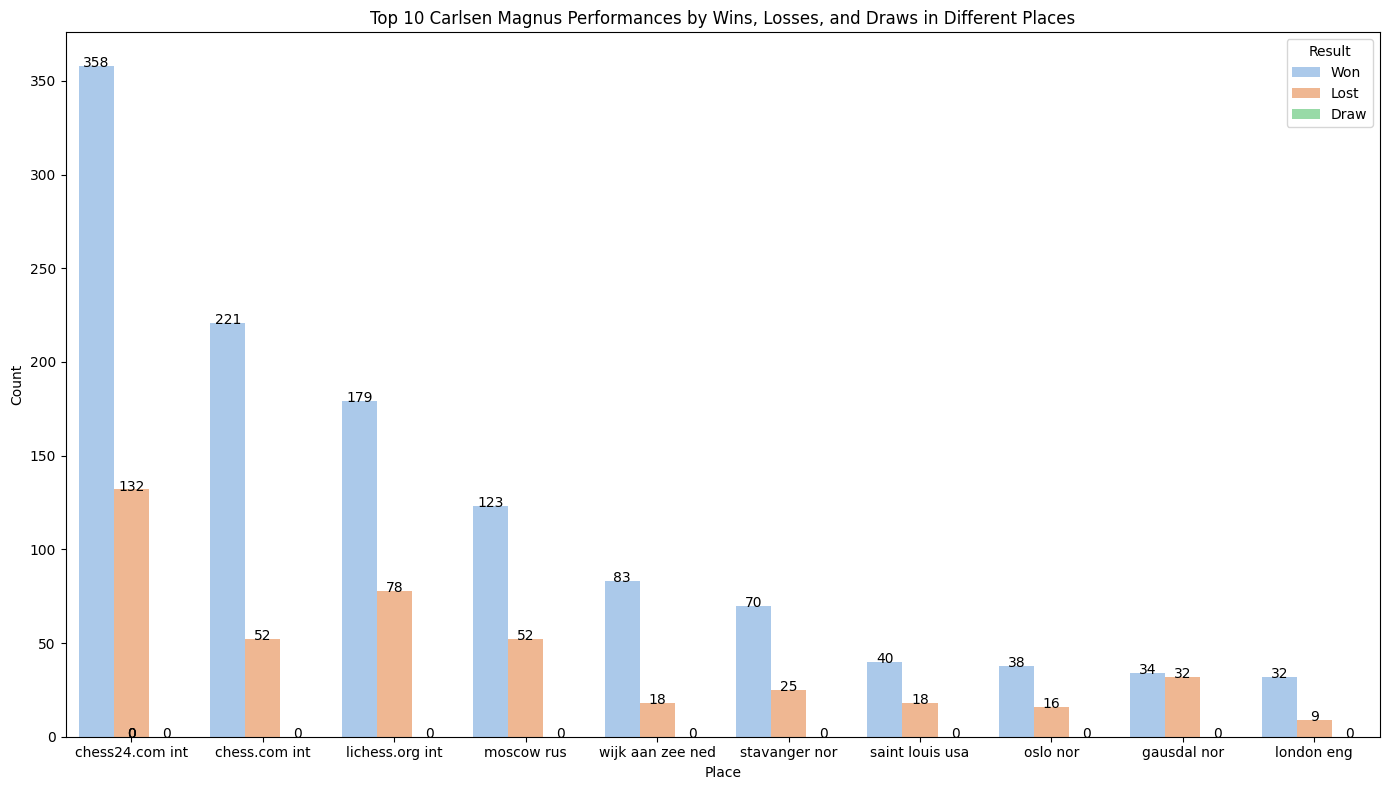

In [ ]:
# Filter rows where Carlsen Magnus is involved
carlsen_games = ds1[(ds1['winner'] == 'Carlsen,Magnus') | (ds1['loser'] == 'Carlsen,Magnus')].copy()

# Normalize event, round, and site columns using .loc to avoid SettingWithCopyWarning
carlsen_games.loc[:, 'event'] = carlsen_games['event'].str.lower().str.strip()
carlsen_games.loc[:, 'round'] = carlsen_games['round'].astype(str).str.lower().str.strip()
carlsen_games.loc[:, 'site'] = carlsen_games['site'].str.lower().str.strip()

# Replace 'Win', 'Lost', 'Draw' with 1, 0, -1 for aggregation
carlsen_games.loc[:, 'Carlsen,Magnus Result'] = carlsen_games['Carlsen,Magnus Result'].replace({
    'Win': 1,
    'Lost': 0,
    'Draw': -1
})
# Extract unique sites
unique_sites = carlsen_games['site'].unique()
# Initialize a list to store aggregated results
aggregated_results = []
# Iterate over unique sites
for site in unique_sites:
    # Filter data for current site using .loc
    subset = carlsen_games.loc[carlsen_games['site'] == site]
    # Aggregate data for the current subset
    summary = {
        'Place': site,
        'Won': (subset['Carlsen,Magnus Result'] == 1).sum(),
        'Lost': (subset['Carlsen,Magnus Result'] == 0).sum(),
        'Draw': (subset['Carlsen,Magnus Result'] == -1).sum(),
        'Average_Winner_Elo': subset['winner_elo'].mean(),
        'Average_Loser_Elo': subset['loser_elo'].mean()
    }
    # Append the summary to the list
    aggregated_results.append(summary)
# Create a DataFrame from the aggregated results
carlsen_performance = pd.DataFrame(aggregated_results)
# Sort by Wins, Losses, and Draws in descending order
carlsen_performance = carlsen_performance.sort_values(by=['Won', 'Lost', 'Draw'], ascending=False)
# Display the top 10 entries
top_10_performance = carlsen_performance.head(10)
print(top_10_performance)
# Plotting the results
plt.figure(figsize=(14, 8))
# Bar plot for Wins, Losses, and Draws
ax_site=sns.barplot(data=top_10_performance.melt(id_vars='Place', value_vars=['Won', 'Lost', 'Draw']),
            x='Place', y='value', hue='variable', palette='pastel')
# Adding data labels
for p in ax_site.patches:
    height = p.get_height()
    ax_site.text(
        p.get_x() + p.get_width() / 2.,
        height + 1.5,
        '{:.0f}'.format(height),
        ha='center', va='center'
    )
# Adding titles and labels
plt.title("Top 10 Carlsen Magnus Performances by Wins, Losses, and Draws in Different Places")
plt.xlabel("Place")
plt.ylabel("Count")
plt.legend(title='Result')
# Display the plot
plt.tight_layout()
plt.show()

---
From this we can conclude that Magnus Carlsen shows a preference for online chess tournaments, where he achieves his highest number of wins an d we cannot underestimate him in offline tournaments also.


---





 # 6) Carlsen Performance according to Average_winner_elo in different rounds



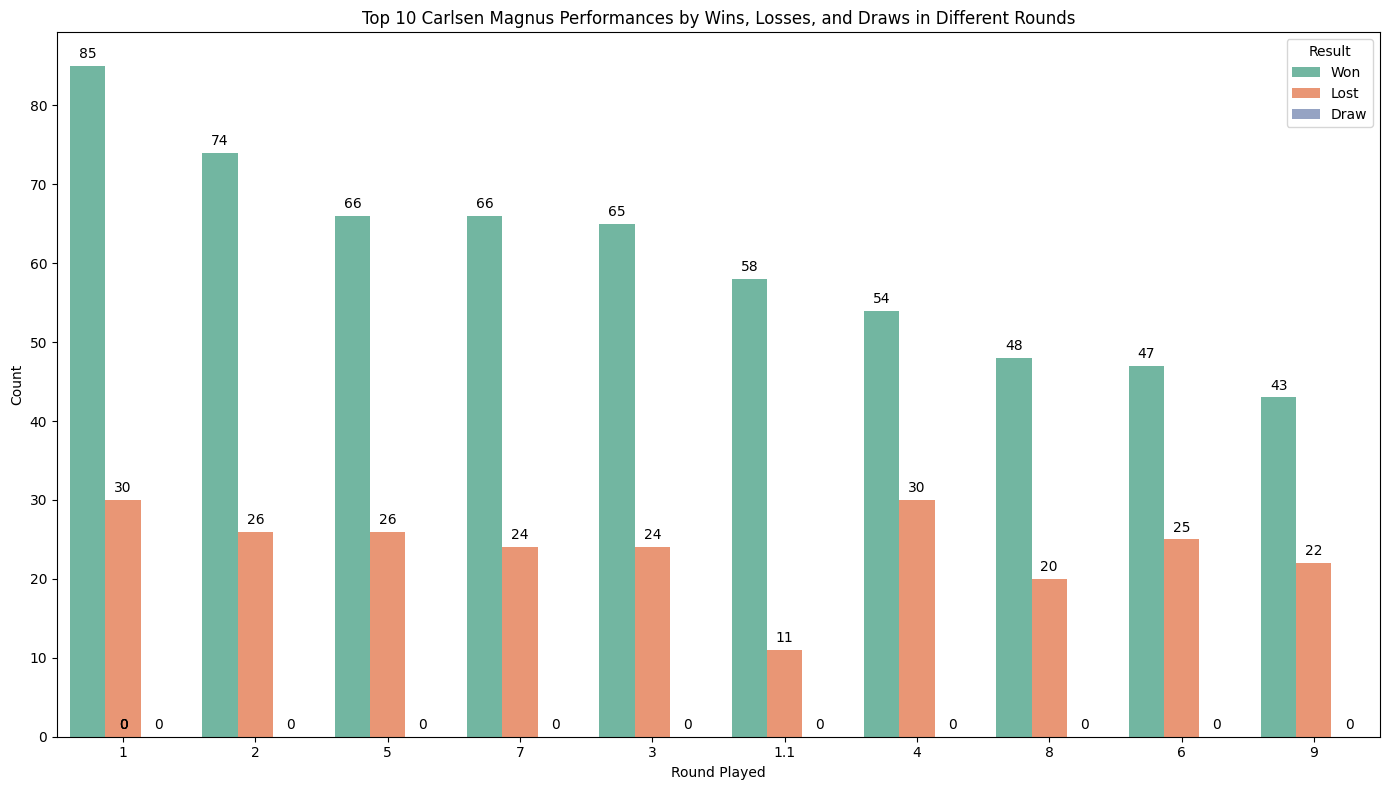

In [ ]:
# Filter rows where Carlsen Magnus is involved
carlsen_games1 = ds1[(ds1['winner'] == 'Carlsen,Magnus') | (ds1['loser'] == 'Carlsen,Magnus')].copy()

# Normalize round columns
carlsen_games1.loc[:, 'round'] = carlsen_games1['round'].astype(str).str.lower().str.strip()

# Replace 'Win', 'Lost', 'Draw' with 1, 0, -1 for aggregation
carlsen_games1.loc[:, 'Carlsen,Magnus Result'] = carlsen_games1['Carlsen,Magnus Result'].replace({
    'Win': 1,
    'Lost': 0,
    'Draw': -1
})
# Extract unique rounds
unique_rounds = carlsen_games1['round'].unique()

# Initialize a list to store aggregated results
aggregated_results1 = []

# Iterate over unique rounds
for round_played in unique_rounds:
    # Filter data for current round using .loc
    subset = carlsen_games1.loc[carlsen_games1['round'] == round_played]
    # Aggregate data for the current subset
    summary1 = {
        'Round Played': round_played,
        'Won': (subset['Carlsen,Magnus Result'] == 1).sum(),
        'Lost': (subset['Carlsen,Magnus Result'] == 0).sum(),
        'Draw': (subset['Carlsen,Magnus Result'] == -1).sum(),
        'Average_Winner_Elo': subset['winner_elo'].mean(),
        'Average_Loser_Elo': subset['loser_elo'].mean()
    }
    # Append the summary to the list
    aggregated_results1.append(summary1)
# Create a DataFrame from the aggregated results
magnus_c_performance = pd.DataFrame(aggregated_results1)
# Sort by Wins, Losses, and Draws in descending order
magnus_performance_sorted = magnus_c_performance.sort_values(by=['Won', 'Lost', 'Draw'], ascending=False)
# Display the top 5 entries
top_10_performance = magnus_performance_sorted.head(10)
# Plotting the results
plt.figure(figsize=(14, 8))
# Bar plot for Wins, Losses, and Draws
ax = sns.barplot(data=top_10_performance.melt(id_vars='Round Played', value_vars=['Won', 'Lost', 'Draw']),
                 x='Round Played', y='value', hue='variable', palette='Set2')
# Adding titles and labels
plt.title("Top 10 Carlsen Magnus Performances by Wins, Losses, and Draws in Different Rounds")
plt.xlabel("Round Played")
plt.ylabel("Count")
plt.legend(title='Result')
# Adding data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1.5,
        '{:.0f}'.format(height),
        ha='center', va='center'
    )
# Display the plot
plt.tight_layout()
plt.show()



---
From the bar chart we can conclude that Magnus Carlsen consistently outperforms with more wins than losses or draws across all rounds.But I prefer to play with him in 9th or 10th round.


---




# 7) Magnus Carlsen performance by win,lost,draw in different events



Top 10 Carlsen Magnus Performances by Wins, Losses, and Draws in different events:
                     Event Played  Wins  Losses  Draws  Average_Winner_Elo  \
261      chess24 banter blitz cup    55      14      0         2832.884058   
298      carlsen-tang bullet 2021    48      27      0         2745.360000   
66                    world blitz    48      25      0         2743.602740   
288          chess.com speed 2020    40      19      0         2823.661017   
214        pro league group stage    34       3      0         2815.837838   
282      katara bullet final 2020    26      12      0         2778.947368   
226  chess.com speed 1m+1spm 2017    26       7      0         2809.333333   
227  chess.com speed 5m+2spm 2017    24       2      0         2829.576923   
16                         ch-nor    22       3      0         2545.840000   
123                vi world blitz    21      10      0         2771.645161   

     Average_Loser_Elo  
261        2685.956522  
298     

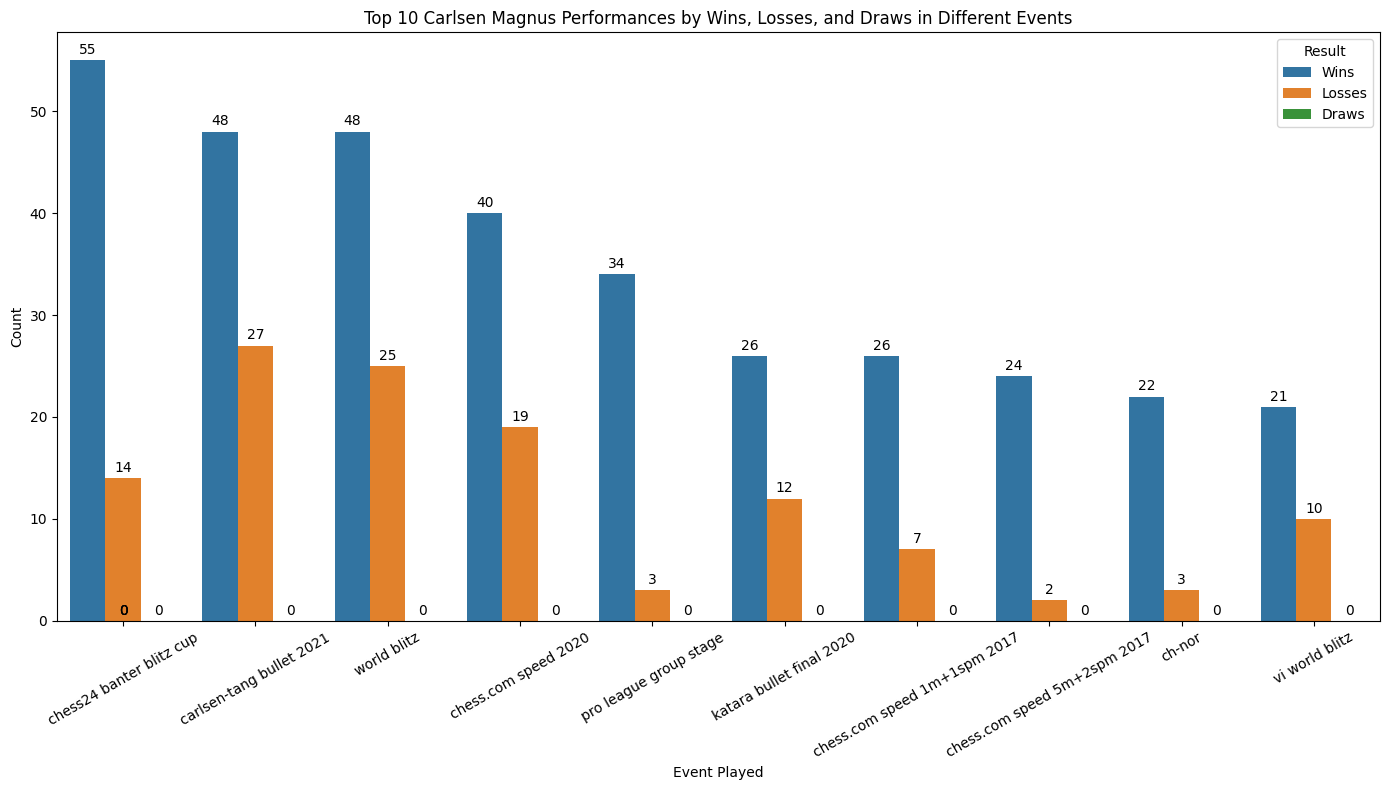

In [ ]:
# Step 1: Filter rows where Carlsen Magnus is involved
carlsen_games3 = ds1[(ds1['winner'] == 'Carlsen,Magnus') | (ds1['loser'] == 'Carlsen,Magnus')].copy()
# Step 2: Normalize event column using .loc
carlsen_games3.loc[:, 'event'] = carlsen_games3['event'].str.lower().str.strip()
# Step 3: Replace 'Win', 'Lost', 'Draw' with 1, 0, -1 for aggregation
carlsen_games3.loc[:, 'Carlsen,Magnus Result'] = carlsen_games3['Carlsen,Magnus Result'].replace({
    'Win': 1,
    'Lost': 0,
    'Draw': -1
})
# Step 4: Aggregate data by event
aggregated_results3 = []
# Iterate over unique events
for event in carlsen_games3['event'].unique():
    # Filter data for current event
    subset = carlsen_games3[carlsen_games3['event'] == event]
    if len(subset) > 0:  # Ensure subset is not empty
        # Aggregate data for the current subset
        summary3 = {
            'Event Played': event,
            'Wins': (subset['Carlsen,Magnus Result'] == 1).sum(),
            'Losses': (subset['Carlsen,Magnus Result'] == 0).sum(),
            'Draws': (subset['Carlsen,Magnus Result'] == -1).sum(),
            'Average_Winner_Elo': subset['winner_elo'].mean(),
            'Average_Loser_Elo': subset['loser_elo'].mean()
        }
        aggregated_results3.append(summary3)
# Step 5: Create DataFrame from aggregated results
c_magnus_performance = pd.DataFrame(aggregated_results3)
# Step 6: Sort by Wins, Losses, and Draws in descending order and display top 10
c_magnus_performance_sorted = c_magnus_performance.sort_values(by=['Wins', 'Losses', 'Draws'], ascending=False).head(10)
# Display the top 5 performance sorted by Wins, Losses, and Draws
print("Top 10 Carlsen Magnus Performances by Wins, Losses, and Draws in different events:")
print(c_magnus_performance_sorted)
# Plotting the results
plt.figure(figsize=(14, 8))
# Bar plot for Wins, Losses, and Draws
ax = sns.barplot(data=c_magnus_performance_sorted.melt(id_vars='Event Played', value_vars=['Wins', 'Losses', 'Draws']),
                 x='Event Played', y='value', hue='variable', palette='tab10')
# Adding titles and labels
plt.title("Top 10 Carlsen Magnus Performances by Wins, Losses, and Draws in Different Events")
plt.xlabel("Event Played")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title='Result')

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        '{:.0f}'.format(height),
        ha='center', va='center'
    )
# Display the plot
plt.tight_layout()
plt.show()



---
From this graph we can say that he is performing well in all of the events.


---





# 8) Magnus Carlsen Performance(win) according to the eco codes and chess opening variants



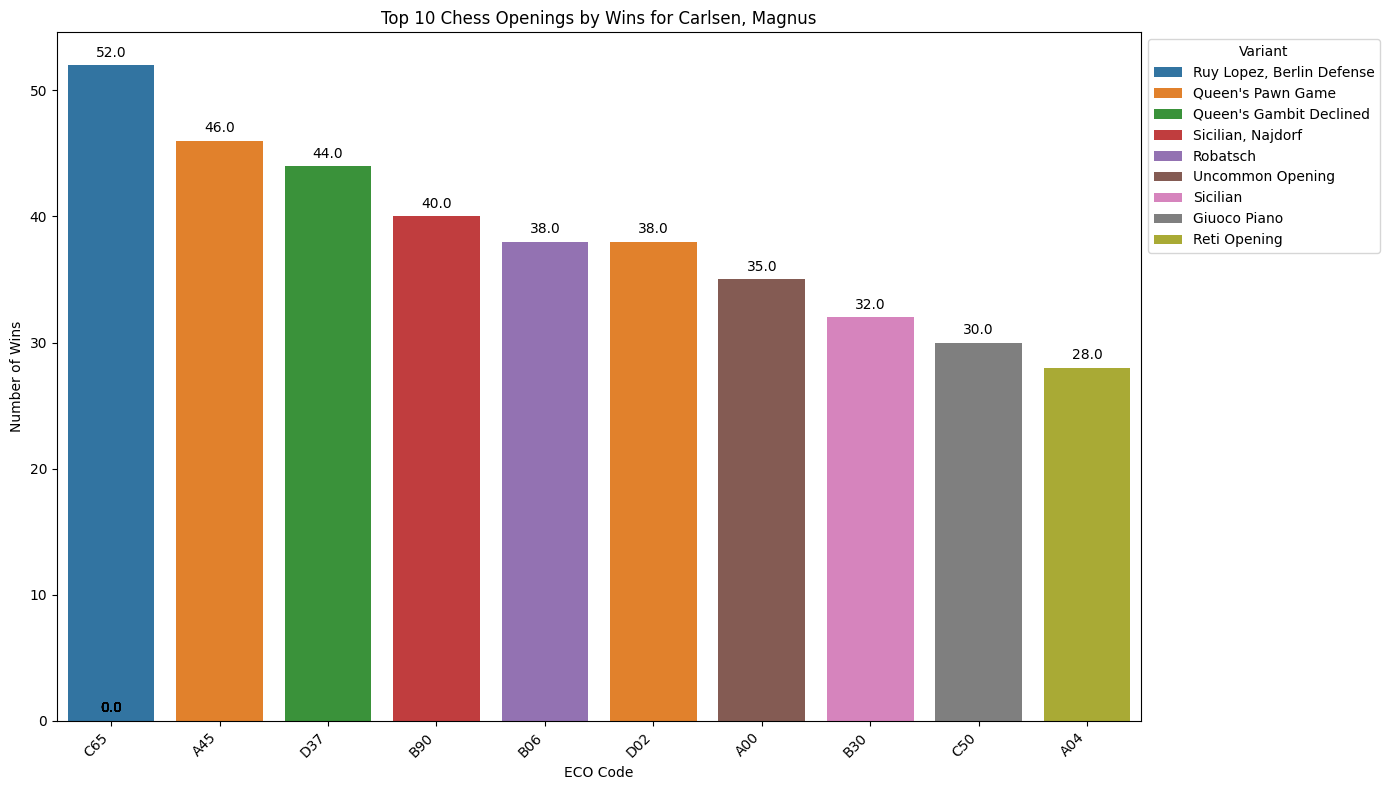

Top 10 Chess Openings by Wins for Carlsen, Magnus:
     eco                    variant  Wins  Losses  Draws  Average_Winner_Elo  \
187  C65  Ruy Lopez, Berlin Defense    52      21      0         2803.424658   
40   A45          Queen's Pawn Game    46      10      0         2793.785714   
245  D37    Queen's Gambit Declined    44      24      0         2787.073529   
133  B90          Sicilian, Najdorf    40       9      0         2802.204082   
67   B06                   Robatsch    38      11      0         2802.000000   
218  D02          Queen's Pawn Game    38       5      0         2833.906977   
0    A00           Uncommon Opening    35      14      0         2775.346939   
89   B30                   Sicilian    32      18      0         2785.300000   
176  C50               Giuoco Piano    30       8      0         2832.605263   
4    A04               Reti Opening    28      10      0         2787.815789   

     Average_Loser_Elo  
187        2753.095890  
40         2685.26

In [ ]:
#Step 1: Filter and clean data
carlsen_games4 = ds1[(ds1['winner'] == 'Carlsen,Magnus') | (ds1['loser'] == 'Carlsen,Magnus')].copy()
#Normalize the ECO and variant columns
carlsen_games4['eco'] = carlsen_games4['eco'].str.strip()
carlsen_games4['variant'] = carlsen_games4['variant'].str.strip()
#Replace 'Win', 'Lost', 'Draw' with numerical values for aggregation
carlsen_games4['Carlsen,Magnus Result'] = carlsen_games4['Carlsen,Magnus Result'].replace({
'Win': 1,
'Lost': 0,
'Draw': -1
})
#Step 2: Aggregate data by ECO and variant
aggregated_results4 = carlsen_games4.groupby(['eco', 'variant']).agg(
Wins=('Carlsen,Magnus Result', lambda x: (x == 1).sum()),
Losses=('Carlsen,Magnus Result', lambda x: (x == 0).sum()),
Draws=('Carlsen,Magnus Result', lambda x: (x == -1).sum()),
Average_Winner_Elo=('winner_elo', 'mean'),
Average_Loser_Elo=('loser_elo', 'mean') # Include Average Loser Elo
).reset_index()
#Top 10 ECO codes by number of wins
top_10_eco_wins = aggregated_results4.nlargest(10, 'Wins')
#Plot 1: Wins by ECO codes
plt.figure(figsize=(14, 8))
barplot1=sns.barplot(x='eco', y='Wins', data=top_10_eco_wins, hue='variant')
# Adding the data labels
for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
plt.title('Top 10 Chess Openings by Wins for Carlsen, Magnus')
plt.xlabel('ECO Code')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variant', bbox_to_anchor=(1, 1), loc='upper left') # Legend to the upper left
plt.tight_layout()
plt.show()
#Display the top 10 aggregated results by wins
print("Top 10 Chess Openings by Wins for Carlsen, Magnus:")
print(top_10_eco_wins)



---
From the bar chart,we can say that Magnus Carlsen demonstrates proficiency in both defensive strategies using Ruy Lopez,Berlin Defense, as well as offensive tactics such as the Queen's Gambit, showcasing his versatility and strategic prowess in chess.


---





# 9) Magnus Carlsen Performance(loss and draw) according to the eco codes and chess opening variants



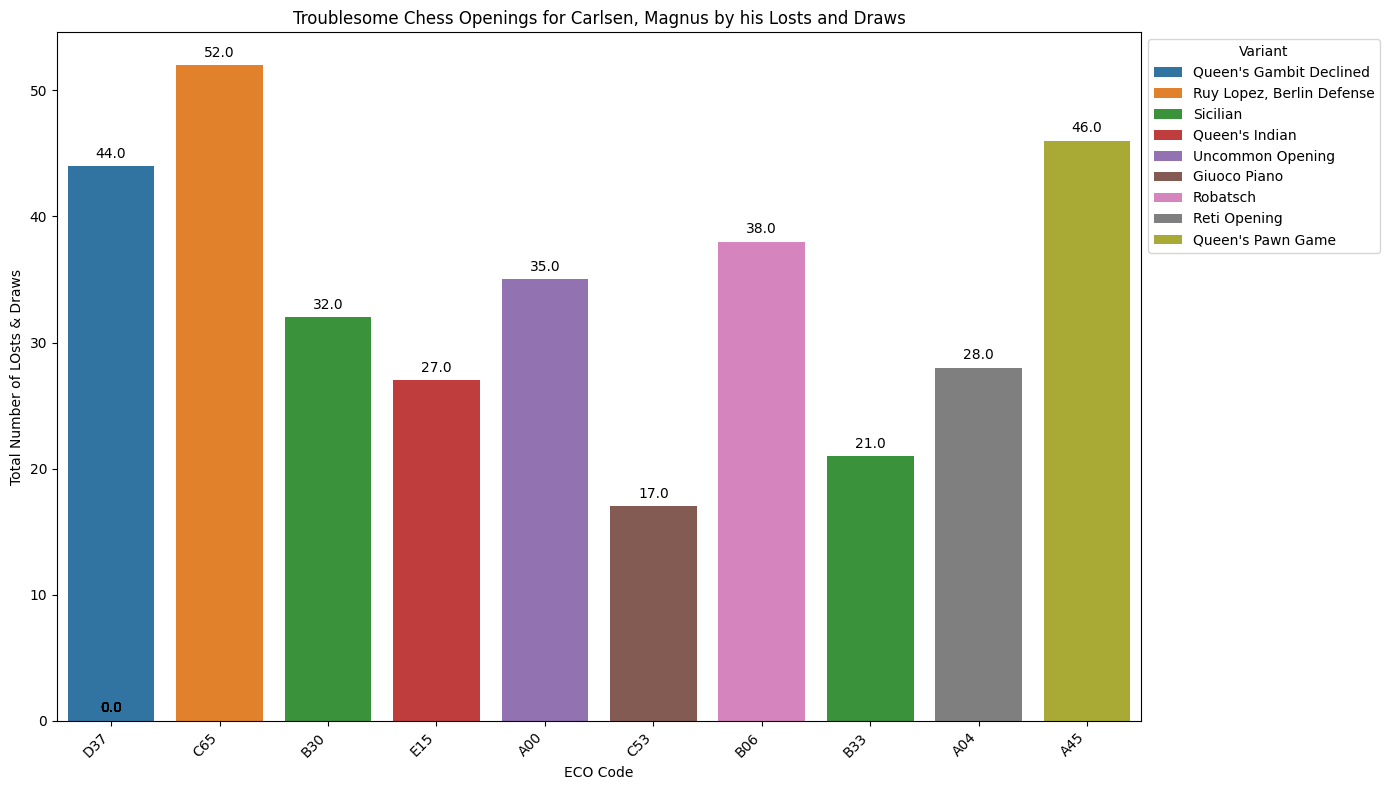

Top 10 Chess Openings by Wins for Carlsen, Magnus:
     eco                    variant  Wins  Losses  Draws  Average_Winner_Elo  \
245  D37    Queen's Gambit Declined    44      24      0         2787.073529   
187  C65  Ruy Lopez, Berlin Defense    52      21      0         2803.424658   
89   B30                   Sicilian    32      18      0         2785.300000   
296  E15             Queen's Indian    27      15      0         2724.738095   
0    A00           Uncommon Opening    35      14      0         2775.346939   
178  C53               Giuoco Piano    17      14      0         2799.064516   
67   B06                   Robatsch    38      11      0         2802.000000   
92   B33                   Sicilian    21      11      0         2692.000000   
4    A04               Reti Opening    28      10      0         2787.815789   
40   A45          Queen's Pawn Game    46      10      0         2793.785714   

     Average_Loser_Elo  
245        2743.411765  
187        2753.09

In [ ]:
#Step 1: Filter and clean data
carlsen_games4 = ds1[(ds1['winner'] == 'Carlsen,Magnus') | (ds1['loser'] == 'Carlsen,Magnus')].copy()
#Normalize the ECO and variant columns
carlsen_games4['eco'] = carlsen_games4['eco'].str.strip()
carlsen_games4['variant'] = carlsen_games4['variant'].str.strip()
#Replace 'Win', 'Lost', 'Draw' with numerical values for aggregation
carlsen_games4['Carlsen,Magnus Result'] = carlsen_games4['Carlsen,Magnus Result'].replace({
'Win': 1,
'Lost': 0,
'Draw': -1
})
#Step 2: Aggregate data by ECO and variant
aggregated_results4 = carlsen_games4.groupby(['eco', 'variant']).agg(
Wins=('Carlsen,Magnus Result', lambda x: (x == 1).sum()),
Losses=('Carlsen,Magnus Result', lambda x: (x == 0).sum()),
Draws=('Carlsen,Magnus Result', lambda x: (x == -1).sum()),
Average_Winner_Elo=('winner_elo', 'mean'),
Average_Loser_Elo=('loser_elo', 'mean') # Include Average Loser Elo
).reset_index()
#Top 10 ECO codes by number of wins
top_10_eco_wins = aggregated_results4.nlargest(10, ['Losses','Draws'])
#Plot 1: Wins by ECO codes
plt.figure(figsize=(14, 8))
barplot1=sns.barplot(x='eco', y='Wins', data=top_10_eco_wins, hue='variant')
# Adding the data labels
for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
plt.title('Troublesome Chess Openings for Carlsen, Magnus by his Losts and Draws')
plt.xlabel('ECO Code')
plt.ylabel('Total Number of LOsts & Draws')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Variant', bbox_to_anchor=(1, 1), loc='upper left') # Legend to the upper left
plt.tight_layout()
plt.show()
#Display the top 10 aggregated results by wins
print("Top 10 Chess Openings by Wins for Carlsen, Magnus:")
print(top_10_eco_wins)




---

Opponents used Queen Gambit Declined to outwit the Magnus tactics but it seems some of them made it. So I will choose Ruy Lopez,Berlin Defense to give a tough competition to him.

---





# 10) Top 10 frequently used openings by Carlsen



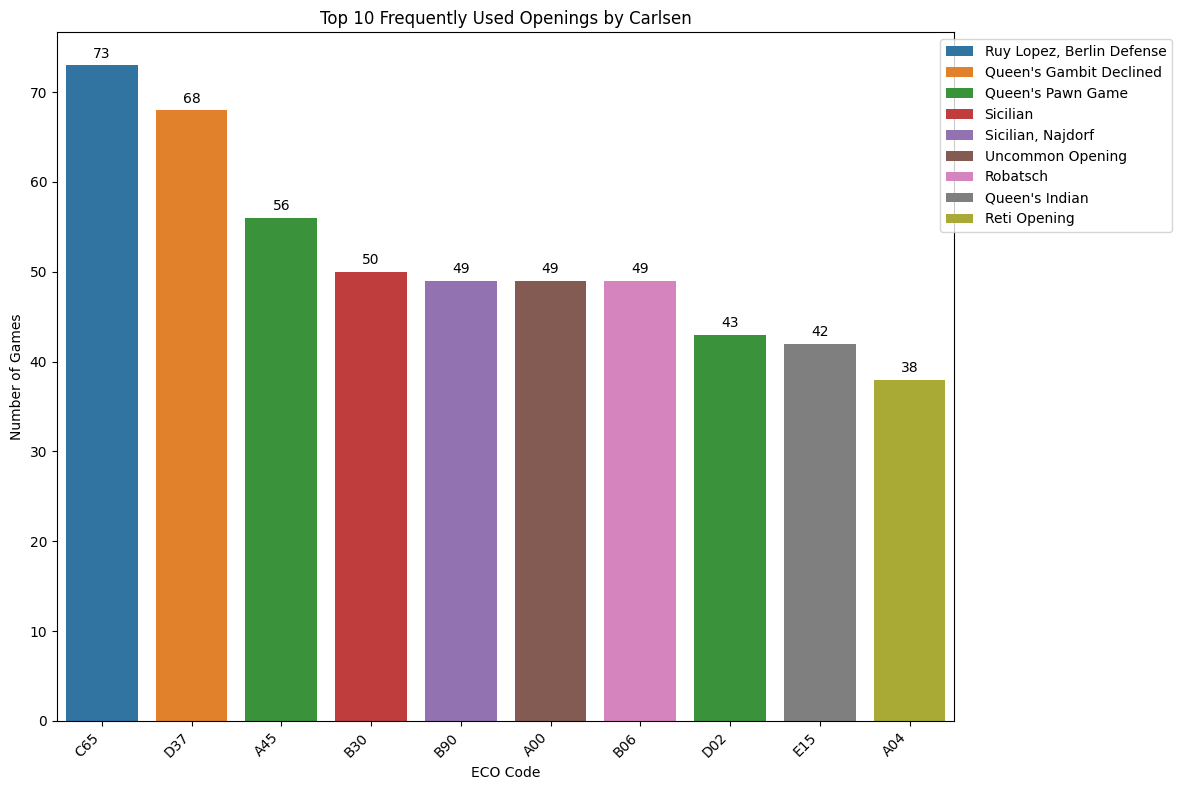

In [ ]:
# Step 1: Filter games involving Carlsen
carlsen_games = ds1[(ds1['winner'] == 'Carlsen,Magnus') | (ds1['loser'] == 'Carlsen,Magnus')].copy()

# Step 2: Count occurrences of each ECO code
eco_counts = carlsen_games['eco'].value_counts()

# Step 3: Get the top 10 most frequent ECO codes
top_10_eco = eco_counts.head(10)

# Step 4: Get opening names from variant column for the top 10 ECO codes
opening_names = []
for eco_code in top_10_eco.index:
    variant_name = carlsen_games.loc[carlsen_games['eco'] == eco_code, 'variant'].iloc[0]
    opening_names.append(variant_name)

# Combine top 10 ECO codes and opening names into a DataFrame
top_10_openings = pd.DataFrame({
    'eco': top_10_eco.index,
    'count': top_10_eco.values,
    'variant': opening_names
})
# Plotting
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='eco', y='count', hue='variant', data=top_10_openings, dodge=False)
# Add numbers on top of bars
for i in range(len(top_10_openings)):
    plt.text(i, top_10_openings['count'].iloc[i] + 0.5, top_10_openings['count'].iloc[i], ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Frequently Used Openings by Carlsen')
plt.xlabel('ECO Code')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
# Adjust legend placement
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()



---

Here we can see that he is using Queen's Gambit Declined to outwit his opponents and he is using Sicilian to attack opponent chess pieces.

---





# 11) Bar chart to display win, loss, and draw rates against different opponents



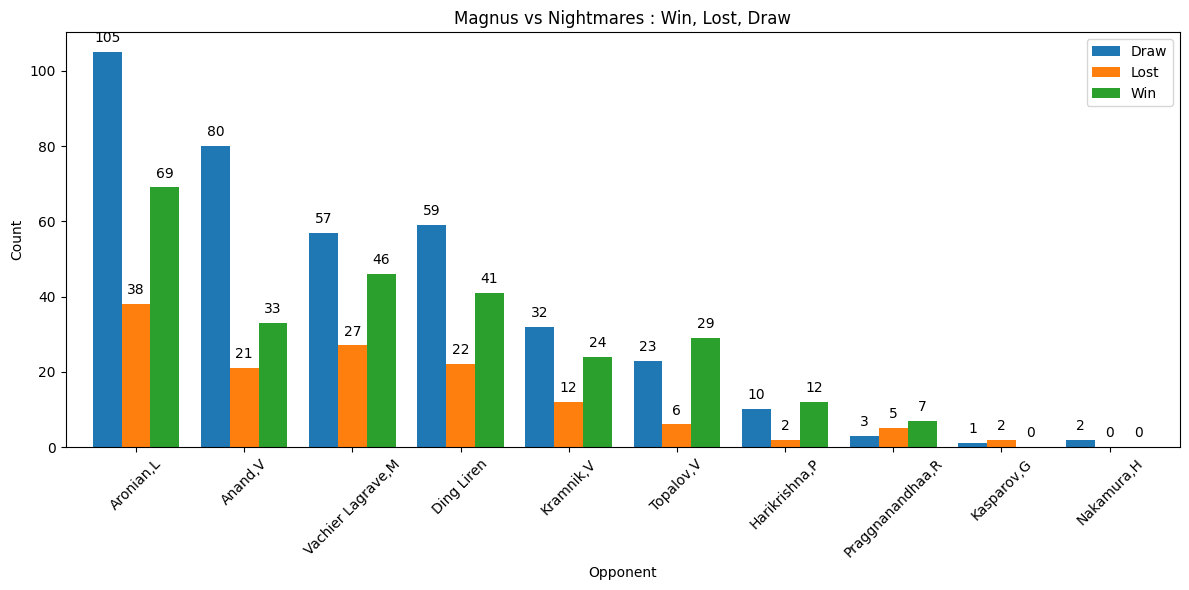

In [ ]:
# List of specified opponents
opponents = [
    'Praggnanandhaa,R',
    'Anand,V',
    'Nakamura,H',
    'Kasparov,G',
    'Harikrishna,P',
    'Aronian,L',
    'Kramnik,V',
    'Ding Liren',
    'Topalov,V',
    'Vachier Lagrave,M'
]
# Filter games where Carlsen played against specified opponents
df_filtered = ds1[(ds1['white'].isin(opponents)) | (ds1['black'].isin(opponents))].copy()
# Function to determine opponent based on white and black columns
def get_opponent(row):
    if row['white'] in opponents:
        return row['white']
    elif row['black'] in opponents:
        return row['black']
    else:
        return None
# Apply function to create opponent column
df_filtered['opponent'] = df_filtered.apply(get_opponent, axis=1)
# Function to convert Carlsen,Magnus Result to numerical values
def result_to_numeric(result):
    if result == 'Win':
        return 1
    elif result == 'Lost':
        return 0
    elif result == 'Draw':
        return -1
    else:
        return None
# Convert Carlsen,Magnus Result to numerical values
df_filtered['Carlsen,Magnus Result'] = df_filtered['Carlsen,Magnus Result'].apply(result_to_numeric)
# Calculate total win, lost, draw counts against each opponent
agg_results = df_filtered.groupby('opponent')['Carlsen,Magnus Result'].value_counts().unstack(fill_value=0).loc[opponents]
# Sort opponents based on total counts (win + loss + draw) in descending order
agg_results['Total'] = agg_results.sum(axis=1)
agg_results = agg_results.sort_values(by='Total', ascending=False)
agg_results.drop('Total', axis=1, inplace=True)
# Plotting
plt.figure(figsize=(12, 6))
# Side-by-side bar chart
bars = agg_results.plot(kind='bar', stacked=False, width=0.8, ax=plt.gca())
# Add data labels (total counts) above each bar
for bar in bars.patches:
    plt.gca().annotate(f"{bar.get_height():.0f}",
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.title('Magnus vs Nightmares : Win, Lost, Draw')
plt.xlabel('Opponent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Draw', 'Lost', 'Win'], loc='upper right')  # Adjust legend position
plt.tight_layout()
plt.show()



---

I think Praggnanandhaa.R,Kasparov.G and Nakamura.H are nightmares to carlsen so he can use these openings Ruy Lopez, Berlin Defense
Queen's Pawn Game
Queen's Gambit Declined
Sicilian, Najdorf
Robatsch
Uncommon Opening
Sicilian
Giuoco Piano
Reti Opening to outwit this opponents.



---





# 12) Opponent's ELO Threshhold to beat Magnus,Carlsen



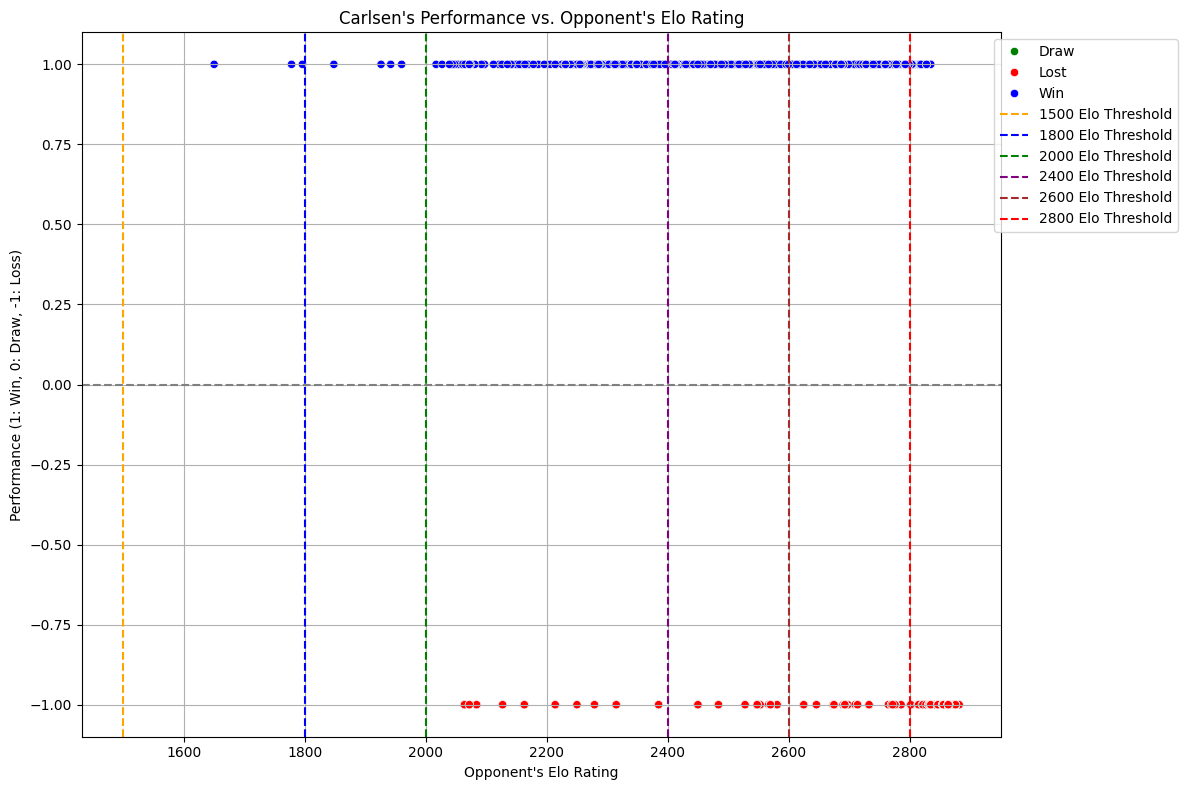

In [ ]:
# Map result strings to numerical values
result_mapping = {'Win': 1, 'Lost': -1, 'Draw': 0}
ds1['carlsen_result_numeric'] = ds1['Carlsen,Magnus Result'].map(result_mapping)
# Scatter plot: Performance vs. Opponent's Elo Rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='loser_elo', y='carlsen_result_numeric', hue='Carlsen,Magnus Result', palette=['green', 'red', 'blue'], data=ds1)
plt.title("Carlsen's Performance vs. Opponent's Elo Rating")
plt.xlabel("Opponent's Elo Rating")
plt.ylabel("Performance (1: Win, 0: Draw, -1: Loss)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(1500, color='orange', linestyle='--', label='1500 Elo Threshold')
plt.axvline(1800, color='blue', linestyle='--', label='1800 Elo Threshold')
plt.axvline(2000, color='green', linestyle='--', label='2000 Elo Threshold')
plt.axvline(2400, color='purple', linestyle='--', label='2400 Elo Threshold')
plt.axvline(2600, color='brown', linestyle='--', label='2600 Elo Threshold')
plt.axvline(2800, color='red', linestyle='--', label='2800 Elo Threshold')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()
plt.show()



---
From this we can say that the opponents who are possesing above 2000 ELO are the tough competition to the Magnus,Carlsen he can use this openings Ruy Lopez, Berlin Defense
Queen's Pawn Game
Queen's Gambit Declined
Sicilian, Najdorf
Robatsch
Uncommon Opening
Sicilian
Giuoco Piano
Reti Opening to outwit his opponents.


---





# 13) Game Termination type Analysis for carlsen performance by his wins,losses and draws



Standard Deviaton Values:
 is_check                    0.226553
is_check_mate               0.014349
is_insufficient_material    0.014181
is_fifty_moves              0.007890
is_fivefold_repetition      0.000000
dtype: float64
                       is_check  is_check_mate  is_insufficient_material  \
Carlsen,Magnus Result                                                      
Draw                   0.227674       0.000000                  0.022662   
Lost                   0.232593       0.014781                  0.000000   
Win                    0.223014       0.019675                  0.000000   

                       is_fifty_moves  is_fivefold_repetition  
Carlsen,Magnus Result                                          
Draw                         0.011060                     0.0  
Lost                         0.000000                     0.0  
Win                          0.005761                     0.0  


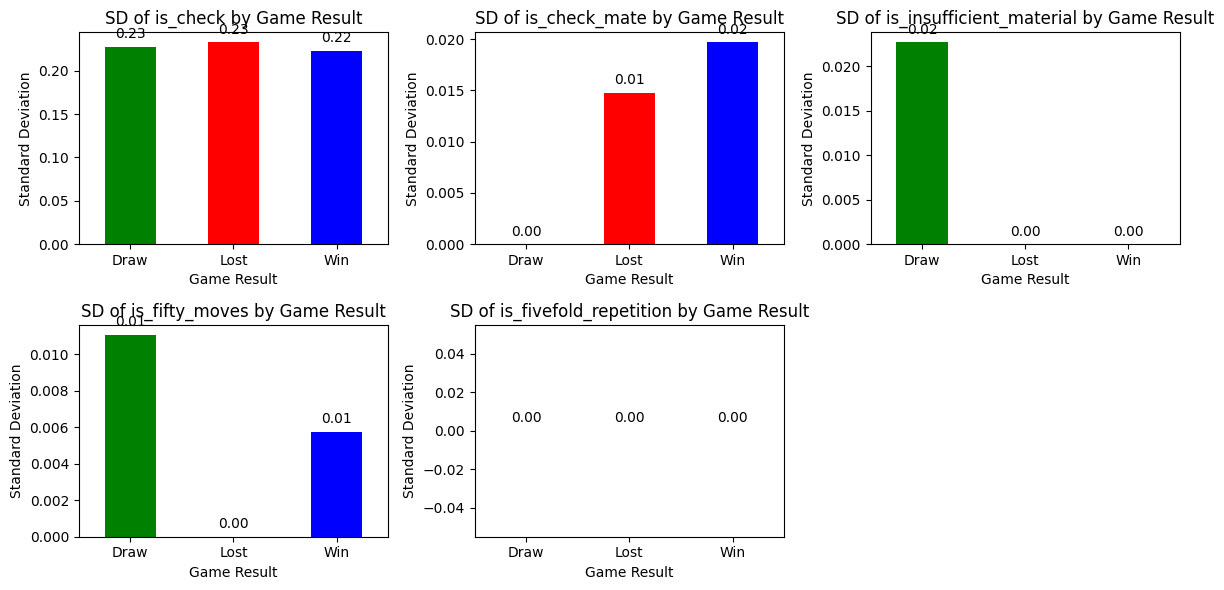

In [ ]:
# Merge datasets on 'gameid'
merged_data = pd.merge(ds1, ds2, on='game_id')
# Define termination types and result categories
termination_types = ['is_check', 'is_check_mate', 'is_insufficient_material', 'is_fifty_moves', 'is_fivefold_repetition']
result_categories = ['win', 'loss', 'draw']
print('Standard Deviaton Values:\n',ds2[termination_types].std())
# Calculate mean or standard deviation of termination types for each result category
sdgt_results = merged_data.groupby('Carlsen,Magnus Result')[termination_types].std()
print(sdgt_results)
# Plotting the comparison
plt.figure(figsize=(12, 6))
# Iterate over each termination type
for i, term_type in enumerate(termination_types):
    plt.subplot(2, 3, i + 1)  # Create subplots
    # Plot each result category's standard deviation for the termination type
    bars_termination=sdgt_results[term_type].plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title(f'SD of {term_type} by Game Result')
    plt.xlabel('Game Result')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=0)
    plt.tight_layout()
    # Adding data labels
    for p in bars_termination.patches:
        plt.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()



---

From this we can say that he is consistent at blocking his opponent's moves by making checks and he got checkmated consistently by his opponents this tells that he is loosing his eyes on king in the endgame and his eyes will be on opponent's king also to checkmate them.The insufficent material shows us he is good at taking opponent's pieces and giving his pieces to opponents also and when 2 kings are present along with some other pieces then he defineatly won't loose the game either he wins or make a draw with his opponent this shows his seriousness towards the game.And he will never make a repeated move in his game.

---





# 14) Chess Piece Analysis for carlsen performance by his game result



white_count           3.869461
black_count           3.906016
white_pawn_count      1.953335
black_pawn_count      1.990029
white_queen_count     0.471198
black_queen_count     0.473297
white_bishop_count    0.792554
black_bishop_count    0.789937
white_knight_count    0.808775
black_knight_count    0.802404
white_rook_count      0.703721
black_rook_count      0.703220
dtype: float64
                       white_count  black_count  white_pawn_count  \
Carlsen,Magnus Result                                               
Draw                      4.004276     4.053337          2.024782   
Lost                      3.864884     3.857363          1.967119   
Win                       3.721340     3.763983          1.871007   

                       black_pawn_count  white_queen_count  black_queen_count  \
Carlsen,Magnus Result                                                           
Draw                           2.078238           0.483329           0.484882   
Lost                    

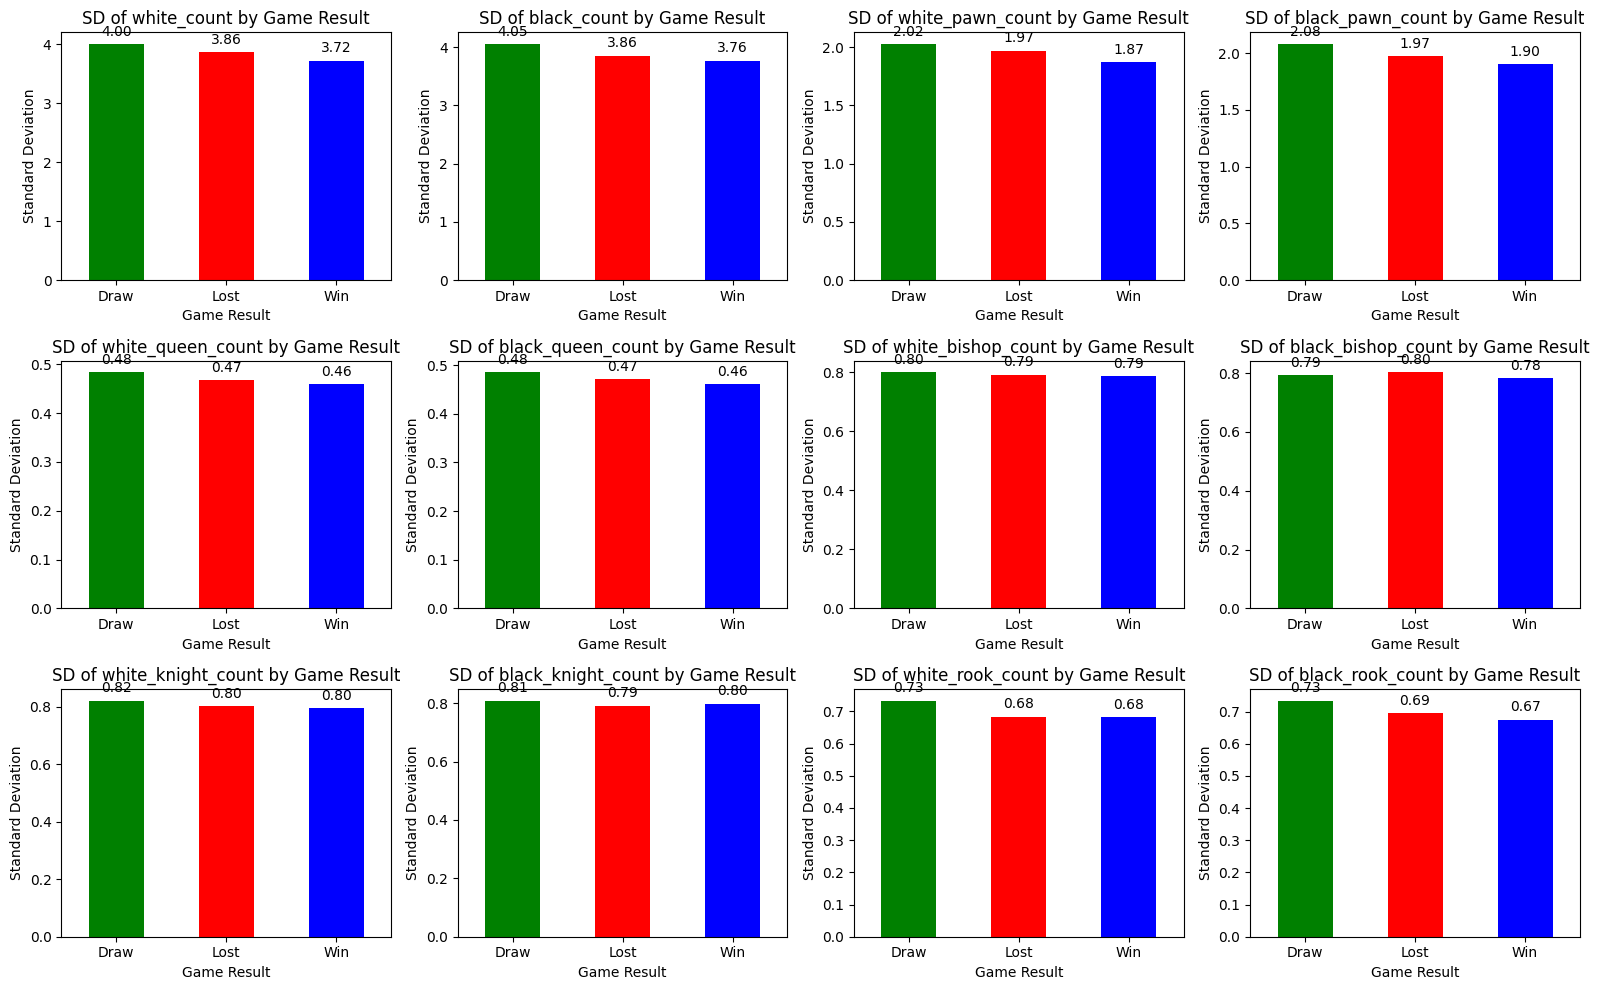

In [ ]:
# Merge datasets on 'game_id'
#merged_data = pd.merge(ds1, ds2, on='game_id')
# Define columns of interest
piece_columns = [
    'white_count', 'black_count',
    'white_pawn_count', 'black_pawn_count',
    'white_queen_count', 'black_queen_count',
    'white_bishop_count', 'black_bishop_count',
    'white_knight_count', 'black_knight_count',
    'white_rook_count', 'black_rook_count'
]
print(ds2[piece_columns].std())
# Calculate standard deviation by Carlsen,Magnus,Result
pagr_results = merged_data.groupby('Carlsen,Magnus Result')[piece_columns].std()
print(pagr_results)
# Plotting the standard deviations
plt.figure(figsize=(16, 10))
# Iterate over each piece column
for i, piece_col in enumerate(piece_columns):
    plt.subplot(3, 4, i + 1)  # Create subplots
    # Plot each result category's standard deviation for the piece column
    bars = pagr_results[piece_col].plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title(f'SD of {piece_col} by Game Result')
    plt.xlabel('Game Result')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=0)
    plt.tight_layout()
    # Adding data labels
    for p in bars.patches:
        plt.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()



---
From this chart we can say that he is good at playing with white as well as black color and he is very good at playing with minor and major pieces in chess game.


---





# 15) Capture analysis for magnus analysis by his game result



Captured Scored for White Color:  11.316147356029619
Captured Scored for Black Color:  11.25081705165643
Captured Score for White and Black Color:                        captured_score_for_white  captured_score_for_black
Carlsen,Magnus Result                                                    
Draw                                  11.745085                 11.678371
Lost                                  11.077849                 11.099311
Win                                   10.934480                 10.832622


<ipython-input-42-69c157ae41f1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Carlsen,Magnus Result', y='captured_score_for_white', data=merged_cpgr, palette='viridis')
<ipython-input-42-69c157ae41f1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Carlsen,Magnus Result', y='captured_score_for_black', data=merged_cpgr, palette='viridis')


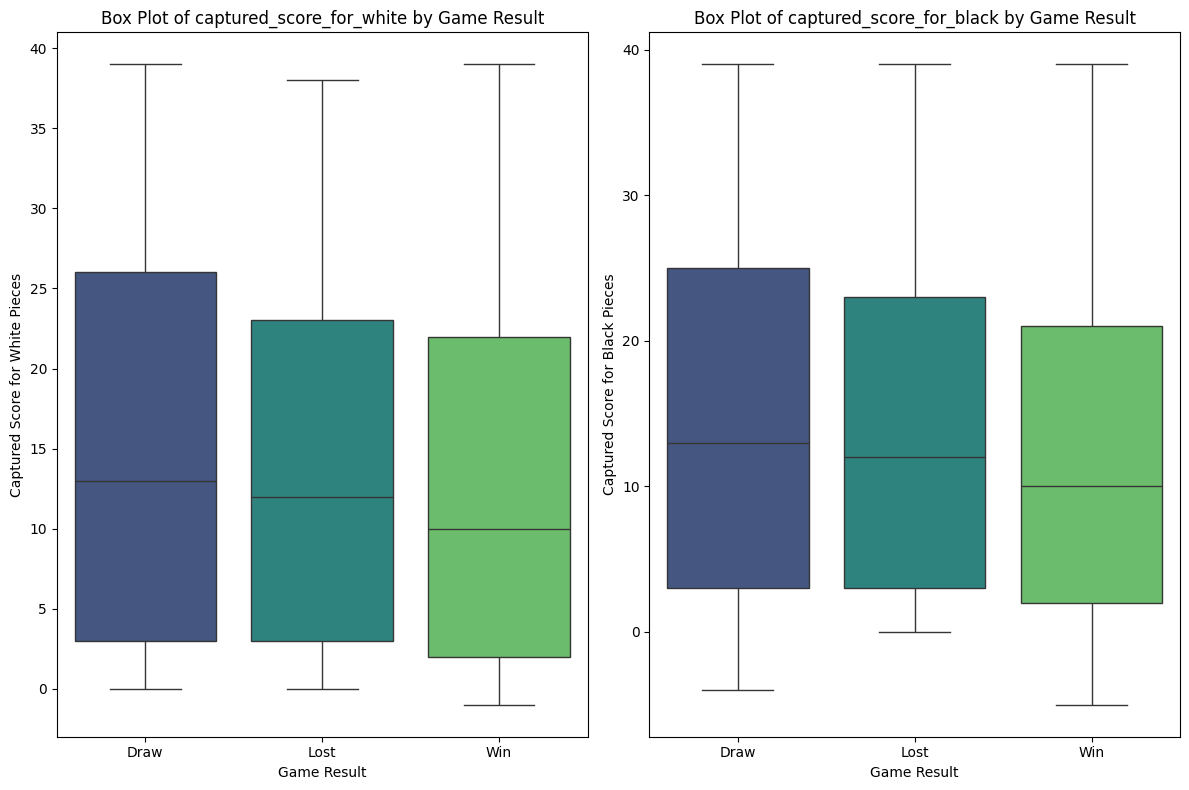

In [ ]:
# Merge datasets on 'game_id'
print('Captured Scored for White Color: ',ds2['captured_score_for_white'].std())
print('Captured Scored for Black Color: ',ds2['captured_score_for_black'].std())
merged_cpgr = pd.merge(ds1, ds2, on='game_id')

# Calculate standard deviation by Carlsen,Magnus,Result
cpgr_results = merged_cpgr.groupby('Carlsen,Magnus Result')[['captured_score_for_white', 'captured_score_for_black']].std()
print('Captured Score for White and Black Color:',cpgr_results)
# Plotting the box plots
plt.figure(figsize=(12, 8))

# Box plot for captured_score_for_white
plt.subplot(1, 2, 1)
sns.boxplot(x='Carlsen,Magnus Result', y='captured_score_for_white', data=merged_cpgr, palette='viridis')
plt.title('Box Plot of captured_score_for_white by Game Result')
plt.xlabel('Game Result')
plt.ylabel('Captured Score for White Pieces')

# Box plot for captured_score_for_black
plt.subplot(1, 2, 2)
sns.boxplot(x='Carlsen,Magnus Result', y='captured_score_for_black', data=merged_cpgr, palette='viridis')
plt.title('Box Plot of captured_score_for_black by Game Result')
plt.xlabel('Game Result')
plt.ylabel('Captured Score for Black Pieces')
plt.tight_layout()
plt.show()



---
From this box chart we can say that he is good at capturing both white and black pieces.


---




# 16) Row wise analysis by his game result



<ipython-input-46-355a92d67bc4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Carlsen,Magnus Result', y='Count', data=white_count_data, palette='pastel')
<ipython-input-46-355a92d67bc4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Carlsen,Magnus Result', y='Count', data=black_count_data, palette='pastel')


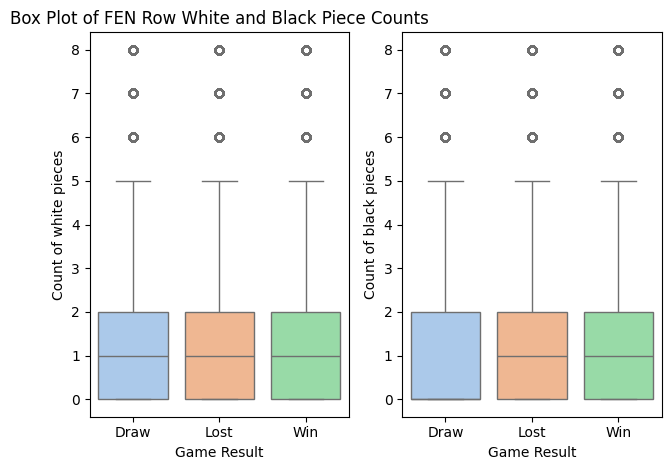

In [ ]:
# Merge datasets on 'game_id'
merged_rwgr = pd.merge(ds1, ds2, on='game_id')

# Select columns of interest for white and black piece counts
white_count_columns = ['fen_row1_white_count', 'fen_row2_white_count', 'fen_row3_white_count',
                       'fen_row4_white_count', 'fen_row5_white_count', 'fen_row6_white_count',
                       'fen_row7_white_count', 'fen_row8_white_count']
black_count_columns = ['fen_row1_black_count', 'fen_row2_black_count', 'fen_row3_black_count',
                       'fen_row4_black_count', 'fen_row5_black_count', 'fen_row6_black_count',
                       'fen_row7_black_count', 'fen_row8_black_count']
# Melt data for violin plots
white_count_data = pd.melt(merged_rwgr, id_vars=['Carlsen,Magnus Result'], value_vars=white_count_columns,
                           var_name='FEN Row White Count', value_name='Count')
black_count_data = pd.melt(merged_rwgr, id_vars=['Carlsen,Magnus Result'], value_vars=black_count_columns,
                           var_name='FEN Row Black Count', value_name='Count')
# Box plot for white piece counts
plt.subplot(1, 2, 1)
sns.boxplot(x='Carlsen,Magnus Result', y='Count', data=white_count_data, palette='pastel')
plt.title('Box Plot of FEN Row White and Black Piece Counts')
plt.xlabel('Game Result')
plt.ylabel('Count of white pieces')

# Box plot for black piece counts
plt.subplot(1, 2, 2)
sns.boxplot(x='Carlsen,Magnus Result', y='Count', data=black_count_data, palette='pastel')
plt.xlabel('Game Result')
plt.ylabel('Count of black pieces')
plt.tight_layout()
plt.show()



---
The Inter Quartile Range (IQR) is same for both colors it suggests that when he won or lost or drew his game he ended up with minimum number of pieces only,furhter we can add he is good at sacrifising his pieces and capturing his opponent's pieces also and there are a few outliers for both white and black pieces. This suggests that in some games, he ended up with a significantly higher or lower number of pieces on chess board.


---



                                                                                                                 

---



# Conclusion


---
In this project, we successfully analyzed the game style of Magnus Carlsen, the world No. 1 chess player. Our key achievements include:


*   **Opeining Game Style Analysis:** We examined Magnus Carlsen's preference for both defensive and attack strategies, highlighting his use of the Ruy Lopez, Berlin Defense, and Queen's Gambit.

*  **Performance Trends:** We identified a consistent upward trend in his ELO rating, reflecting his continuous improvement and dominance in chess.

* ** Tournament Success:** We noted his preference for online tournaments, particularly the chess24 banter blitz cup, where he achieved significant wins.
These results underscore Magnus Carlsen's versatile and adaptive approach to chess, contributing to his sustained success and high rating.

*  **Piece Analysis:**  We conducted a detailed piece analysis, revealing how Carlsen utilizes each piece effectively to outmaneuver his opponents and secure victories.


*   **Row-wise Analysis:** The Inter Quartile Range (IQR) for both colors is similar, indicating Carlsen's strategic piece management. Despite some outliers, he tends to finish games with a comparable number of pieces, showing his proficiency in sacrificing and capturing pieces.

*   **Capture Analysis:** The box chart analysis confirmed his skill in capturing both white and black pieces, demonstrating his tactical prowess.


*  **Game Termination Type Analysis:** Carlsen consistently blocks his opponent's moves with checks and rarely makes repeated moves, indicating his focus on checkmating opponents while being vulnerable to checkmates in endgames. The insufficient material results suggest his effectiveness in capturing opponent pieces and his commitment to the game, as he either wins or draws in scenarios with minimal pieces.


---



# **Future Work**


---

For future analysis, we recommend exploring the following areas:

**Deeper Strategy Analysis:**  Further breakdown of his games to understand his decision-making process in critical moments.

**Comparative Studies:** Comparing Magnus Carlsen's style with other top players to identify unique elements of his approach.

**Move Prediction:** Utilizing machine learning techniques to predict Magnus Carlsen's moves by analyzing his previous games from the dataset ds2, leveraging chess and related modules.

By pursuing these directions, we can gain additional comprehensive insights into the factors contributing to Magnus Carlsen's exceptional performance.


---
**Personal Strategy**
Based on this analysis, when playing against Magnus Carlsen, it would be advantageous to prefer the white pieces and use openings like the Ruy Lopez, Berlin Defense, and Sicilian to provide a tough competition.



---









# Gratitude


---
We express our gratitude to Ms.Vanisha madam and S.Chethan Kumar for their support and collabaration throughout this project. Their contributions have been invaluable in making this analysis possible.

---


